In [ ]:
import numpy as np
import tensorflow as tf
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import pathlib



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size=32
image_height=180
image_width=180

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/data")


In [ ]:
train=tf.keras.utils.image_dataset_from_directory(
    data_dir/'train',
    seed=123,
    batch_size=batch_size,
    image_size=(image_height,image_width)
)


Found 12594 files belonging to 100 classes.


In [ ]:
val=tf.keras.utils.image_dataset_from_directory(
    data_dir/'valid',
    seed=123,
    batch_size=batch_size,
    image_size=(image_height,image_width)
)


Found 500 files belonging to 100 classes.


In [ ]:
test=tf.keras.utils.image_dataset_from_directory(
    data_dir/'test',
    seed=123,
    image_size=(image_height,image_width),
    batch_size=batch_size
)

Found 500 files belonging to 100 classes.


In [ ]:
class_names=train.class_names

In [ ]:
print(f'class_name:{class_names}')

class_name:['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', '

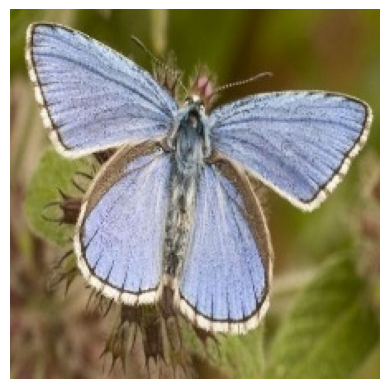

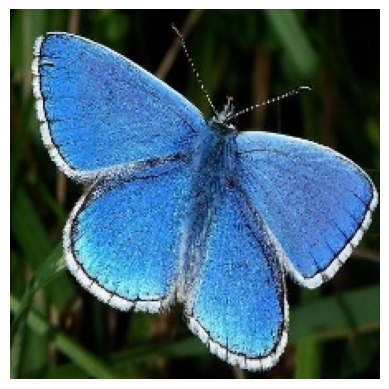

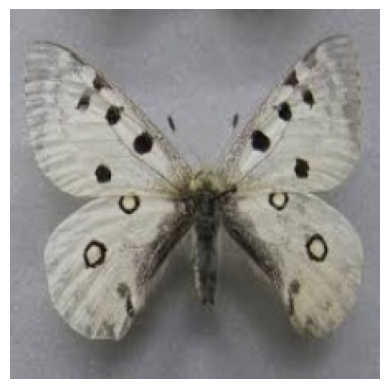

In [ ]:
adonis=list(data_dir.glob('train/ADONIS/*'))
apollo=list(data_dir.glob('train/APPOLLO/*'))

def display_img(image_path):
  image=Image.open(str(image_path))
  plt.imshow(image)
  plt.axis('off')
  plt.show()


if len(adonis)>0:
  display_img(adonis[0])
  display_img(adonis[1])


if len(apollo)>1:
  display_img(apollo[0])


In [ ]:
autotune=tf.data.AUTOTUNE

In [ ]:
train_ds=train.cache().shuffle(1000).prefetch(autotune)
val_ds=val.cache().prefetch(autotune)
test_ds=test.cache().prefetch(autotune)


In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('Horizontal',input_shape=(image_height,image_width,3)),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.2)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    data_augmentation,
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train,
    validation_data=val,
    epochs=40
)

Epoch 1/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 1750s 4s/step - accuracy: 0.0793 - loss: 4.0880 - val_accuracy: 0.3120 - val_loss: 2.6659
Epoch 2/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.3346 - loss: 2.6063 - val_accuracy: 0.4680 - val_loss: 2.0519
Epoch 3/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 544s 1s/step - accuracy: 0.4475 - loss: 2.1157 - val_accuracy: 0.5120 - val_loss: 1.8707
Epoch 4/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.5014 - loss: 1.8445 - val_accuracy: 0.5960 - val_loss: 1.4264
Epoch 5/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - accuracy: 0.5583 - loss: 1.6488 - val_accuracy: 0.6200 - val_loss: 1.3911
Epoch 6/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.5822 - loss: 1.5306 - val_accuracy: 0.6240 - val_loss: 1.4481
Epoch 7/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.6103 - loss: 1.4185 - val_accuracy: 0.6480 - val_loss: 1.2533
Epoch 8/40
394/394 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.6294 - loss: 1.3210 - val_acc

In [ ]:
for cls in class_names:
    count = len(list((data_dir / "train" / cls).glob("*")))
    print(cls, ":", count)


ADONIS : 126
AFRICAN GIANT SWALLOWTAIL : 107
AMERICAN SNOOT : 105
AN 88 : 121
APPOLLO : 128
ARCIGERA FLOWER MOTH : 140
ATALA : 143
ATLAS MOTH : 129
BANDED ORANGE HELICONIAN : 139
BANDED PEACOCK : 118
BANDED TIGER MOTH : 136
BECKERS WHITE : 116
BIRD CHERRY ERMINE MOTH : 133
BLACK HAIRSTREAK : 121
BLUE MORPHO : 107
BLUE SPOTTED CROW : 123
BROOKES BIRDWING : 165
BROWN ARGUS : 169
BROWN SIPROETA : 140
CABBAGE WHITE : 127
CAIRNS BIRDWING : 117
CHALK HILL BLUE : 149
CHECQUERED SKIPPER : 136
CHESTNUT : 122
CINNABAR MOTH : 131
CLEARWING MOTH : 122
CLEOPATRA : 133
CLODIUS PARNASSIAN : 122
CLOUDED SULPHUR : 128
COMET MOTH : 105
COMMON BANDED AWL : 123
COMMON WOOD-NYMPH : 128
COPPER TAIL : 133
CRECENT : 138
CRIMSON PATCH : 103
DANAID EGGFLY : 135
EASTERN COMA : 132
EASTERN DAPPLE WHITE : 132
EASTERN PINE ELFIN : 136
ELBOWED PIERROT : 117
EMPEROR GUM MOTH : 136
GARDEN TIGER MOTH : 131
GIANT LEOPARD MOTH : 129
GLITTERING SAPPHIRE : 130
GOLD BANDED : 104
GREAT EGGFLY : 105
GREAT JAY : 135
GREEN CELL

In [ ]:
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.8007 - loss: 0.7307
Test accuracy: 0.8059999942779541


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/6.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted: BLUE SPOTTED CROW (90.59%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/4.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted: ULYSES (46.78%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/5.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted: CHESTNUT (56.77%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/3.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted: BANDED PEACOCK (66.92%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/butterfly2.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted: RED CRACKER (99.97%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(path):
    img = load_img(path, target_size=(180, 180))   # same size used in training
    arr = img_to_array(img)                        # 0–255 image
    batch = np.expand_dims(arr, 0)                 # create batch of size 1

    logits = model.predict(batch)
    probs = tf.nn.softmax(logits[0]).numpy()

    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]) * 100

label, confidence = predict_image("/content/drive/MyDrive/data/Butterfly-Facts.jpg")
print(f"Predicted: {label} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted: VICEROY (99.36%)
